## CSCS530 Winter 2016
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2016)

  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2016
  * Schedule: Wednesdays and Friday, 1:00-2:30PM ET
  * Location: 120 West Hall (http://www.lsa.umich.edu/cscs/research/computerlab)
  * Teachers: [Mike Bommarito](https://www.linkedin.com/in/bommarito) and [Sarah Cherng](https://www.linkedin.com/pub/sarah-cherng/35/1b7/316)


## PD (Game Theory) Model

  We'll implement the PD model as described in our [Easley & Kleinberg reading here](https://github.com/mjbommar/cscs-530-w2016/raw/master/readings/easley-kleinberg-networks-crowds-markets-ch6.pdf).

In [107]:
%matplotlib inline

import numpy.random
import matplotlib.pyplot as plt

In [108]:
# Setup payoffs
payoff_map = {("NC", "NC"): (-1, -1),
             ("NC", "C"): (-10, 0),
             ("C", "NC"): (0, -10),
             ("C", "C"): (-4, -4)}

In [109]:
my_payoff, your_payoff = payoff_map[("NC", "C")]
print("I got {0}".format(my_payoff))
print("You got {0}".format(your_payoff))

I got -10
You got 0


In [142]:
prob_confess = 0.5

class Player(object):
    """
    Player object.
    """
    
    def __init__(self, payoff_map, prob_confess):
        """
        Constructor
        """
        self.payoff_map = payoff_map
        self.prob_confess = prob_confess
        self.previous_game_payoffs = []
        self.other_player_action = []
        
    def get_action(self):
        """
        Randomly draw action given prob_confess.
        """
        if numpy.random.random() <= prob_confess:
            return "C"
        else:
            return "NC"
        

class AlwaysCUntilDPlayer(object):
    """
    Always cooperates until the other defects.
    
    N.B.: We'll learn about inheritance later.
    """
    def __init__(self, payoff_map):
        """
        Constructor
        """
        self.payoff_map = payoff_map
        self.previous_game_payoffs = []
        self.other_player_action = []
        
    def get_action(self):
        """
        Randomly draw action given prob_confess.
        """
        if self.other_player_action.count("C") > 0:
            return "C"
        else:
            return "NC"

In [140]:
player_a = Player(payoff_map, prob_confess)
player_b = Player(payoff_map, prob_confess)

In [128]:
player_a.get_action()

'C'

In [141]:
class Game(object):
    """
    Game class which stores the two players, their actions, and outcome.
    """
    
    def __init__(self, player_a, player_b):
        """
        Constructor
        """
        self.player_a = player_a
        self.player_b = player_b
        
    def run(self):
        """
        Run the game.
        """
        # Draw the actions/strategies of the players
        self.strategy_a = self.player_a.get_action()
        self.strategy_b = self.player_b.get_action()
        
        # Calculate the outcomes
        self.payoff_a, self.payoff_b = payoff_map[(self.strategy_a, self.strategy_b)]
        self.total_payoff = self.payoff_a + self.payoff_b
        self.average_payoff = (self.payoff_a + self.payoff_b) / 2.0
        
        # Update player memories
        self.player_a.previous_game_payoffs.append(self.payoff_a)
        self.player_b.previous_game_payoffs.append(self.payoff_b)
        self.player_a.other_player_action.append(self.strategy_b)
        self.player_b.other_player_action.append(self.strategy_a)

In [194]:
# Create players
player_a = Player(payoff_map, prob_confess)
player_b = AlwaysCUntilDPlayer(payoff_map)

In [265]:
# Create the game
g = Game(player_a, player_b)

# Run the game
g.run()

print("The strategies were {0}, {1}".format(g.strategy_a, g.strategy_b))
print("The total payoff was {0} and the average payoff was {1}"\
        .format(g.total_payoff, g.average_payoff))
print(player_a.other_player_action)

The strategies were NC, C
The total payoff was -10 and the average payoff was -5.0
['NC', 'NC', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


In [131]:
# Set number of games to run
num_games = 100
game_history = []
total_payoff_history = []

# Create players
player_a = Player(payoff_map, prob_confess)
player_b = Player(payoff_map, prob_confess)

for i in range(num_games):
    # Create and run the game
    g = Game(player_a, player_b)
    g.run()
    
    # Append to the history
    total_payoff_history.append(g.total_payoff)
    game_history.append(g)

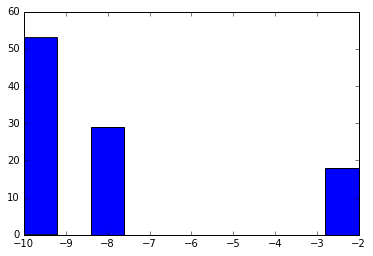

In [132]:
__ = plt.hist(total_payoff_history)

In [138]:
if player_a.other_player_action.count("C") > 0:
    print("Defect")

Defect
